#IMPORTING THE LIBRARIES


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [6]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (3952536, 11)


In [8]:
# Assuming your DataFrame is named 'df'

# For isFraud = 1
df1 = df[df['isFraud'] == 1]

# For isFraud = 0
df2 = df[df['isFraud'] == 0]


print(df1.shape)

print(df2.shape)


(3267, 11)
(3949268, 11)


In [12]:
df3 = pd.concat([df1, df2.head(4000)], axis=0)

# If you want to reset index after concatenation
df3.reset_index(drop=True, inplace=True)

# Checking the combined DataFrame
print(df3.head())
df3.shape

   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   C553264065             0.0             0.0      1.0             0.0  
1    C38997010         21182.0             0.0      1.0             0.0  
2   C972765878             0.0             0.0      1.0             0.0  
3  C1007251739         26202.0             0.0      1.0             0.0  
4  C1848415041             0.0             0.0      1.0             0.0  


(7267, 11)

In [13]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [15]:
class_counts = df3['isFraud'].value_counts()

print(class_counts)

isFraud
0.0    4000
1.0    3267
Name: count, dtype: int64


In [16]:
class_counts = df3['isFlaggedFraud'].value_counts()

print(class_counts)

isFlaggedFraud
0.0    7264
1.0       3
Name: count, dtype: int64


In [17]:
df3.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [19]:
# Retain the 6 features and the target variable
df3 = df3[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [20]:
# Display the first few rows of the dataset
print(df3.head())

# Get the summary statistics of the dataset
print(df3.describe(include="all"))

# Get information about the dataset (columns, data types, non-null counts)
print(df3.info())

    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0    181.0          181.0             0.0             0.0             0.0   
1    181.0          181.0             0.0         21182.0             0.0   
2   2806.0         2806.0             0.0             0.0             0.0   
3   2806.0         2806.0             0.0         26202.0             0.0   
4  20128.0        20128.0             0.0             0.0             0.0   

   isFraud  isFlaggedFraud  
0      1.0             0.0  
1      1.0             0.0  
2      1.0             0.0  
3      1.0             0.0  
4      1.0             0.0  
             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  7.267000e+03   7.267000e+03    7.267000e+03    7.267000e+03   
mean   6.552001e+05   1.183693e+06    5.981495e+05    6.616270e+05   
std    1.600271e+06   2.461306e+06    1.875867e+06    2.117136e+06   
min    0.000000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%    8.0820

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


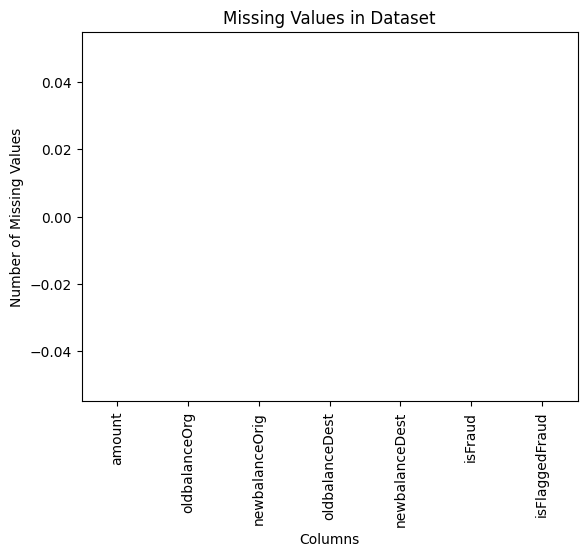

In [21]:
#checking for any missing values
# Check for missing values in each column
missing_values = df3.isnull().sum()
print(missing_values)

# Visualize missing values using a bar chart
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Dataset')
plt.show()

In [22]:
#removing tuples with missing values
# Drop rows with missing values
df_clean = df3.dropna()
df_clean.shape

(7267, 7)

#Using Logistic Regression without normalization and with normalization


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming df is your DataFrame containing the dataset
X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]
y = df_clean['isFraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Print the results
print("Results without normalization:")
print("Training set:")
print(classification_report(y_train, model.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model.predict(X_test)))


Results without normalization:
Training set:
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      3211
         1.0       0.83      0.98      0.90      2602

    accuracy                           0.90      5813
   macro avg       0.90      0.91      0.90      5813
weighted avg       0.91      0.90      0.90      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       789
         1.0       0.81      0.97      0.88       665

    accuracy                           0.88      1454
   macro avg       0.89      0.89      0.88      1454
weighted avg       0.90      0.88      0.88      1454



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df is your DataFrame containing the dataset
X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]
y = df_clean['isFraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the dataset
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_normalized, y_train)

# Print the results
print("Results before normalization:")
print("Training set:")
print(classification_report(y_train, model.predict(X_train_normalized)))
print("Testing set:")
print(classification_report(y_test, model.predict(X_test_normalized)))

# Train the model again on normalized data
model_normalized = LogisticRegression()
model_normalized.fit(X_train_normalized, y_train)

# Print the results after normalization
print("Results after normalization:")
print("Training set:")
print(classification_report(y_train, model_normalized.predict(X_train_normalized)))
print("Testing set:")
print(classification_report(y_test, model_normalized.predict(X_test_normalized)))


Results before normalization:
Training set:
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      3211
         1.0       0.98      0.71      0.82      2602

    accuracy                           0.86      5813
   macro avg       0.89      0.85      0.86      5813
weighted avg       0.89      0.86      0.86      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89       789
         1.0       0.99      0.71      0.82       665

    accuracy                           0.86      1454
   macro avg       0.89      0.85      0.85      1454
weighted avg       0.89      0.86      0.86      1454

Results after normalization:
Training set:
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      3211
         1.0       0.98      0.71      0.82      2602

    accuracy                           0.86      5813
   macro avg       0.89     

#Using KNN classifier without normalization and with normalization

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df is your DataFrame containing the dataset
X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]
y = df_clean['isFraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions and print the results
print("Results without normalization:")
print("Training set:")
print(classification_report(y_train, knn.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, knn.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, knn.predict(X_test)))


Results without normalization:
Training set:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3211
         1.0       0.96      0.98      0.97      2602

    accuracy                           0.97      5813
   macro avg       0.97      0.97      0.97      5813
weighted avg       0.97      0.97      0.97      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       789
         1.0       0.95      0.96      0.95       665

    accuracy                           0.96      1454
   macro avg       0.95      0.96      0.96      1454
weighted avg       0.96      0.96      0.96      1454

Confusion matrix for testing set:
[[753  36]
 [ 29 636]]


In [26]:
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train the KNN classifier on normalized data
knn_normalized = KNeighborsClassifier()
knn_normalized.fit(X_train_normalized, y_train)

# Make predictions and print the results
print("Results with normalization:")
print("Training set:")
print(classification_report(y_train, knn_normalized.predict(X_train_normalized)))
print("Testing set:")
print(classification_report(y_test, knn_normalized.predict(X_test_normalized)))

# Print the confusion matrix
print("Confusion matrix for testing set with normalization:")
print(confusion_matrix(y_test, knn_normalized.predict(X_test_normalized)))


Results with normalization:
Training set:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3211
         1.0       0.96      0.98      0.97      2602

    accuracy                           0.97      5813
   macro avg       0.97      0.97      0.97      5813
weighted avg       0.97      0.97      0.97      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       789
         1.0       0.95      0.96      0.95       665

    accuracy                           0.96      1454
   macro avg       0.96      0.96      0.96      1454
weighted avg       0.96      0.96      0.96      1454

Confusion matrix for testing set with normalization:
[[754  35]
 [ 27 638]]


#Using Decison Tree classifier without normalization and with normalization

In [27]:
from sklearn.tree import DecisionTreeClassifier


# Train the Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions and print the results
print("Results without normalization:")
print("Training set:")
print(classification_report(y_train, dt.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, dt.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, dt.predict(X_test)))


Results without normalization:
Training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3211
         1.0       1.00      1.00      1.00      2602

    accuracy                           1.00      5813
   macro avg       1.00      1.00      1.00      5813
weighted avg       1.00      1.00      1.00      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       789
         1.0       0.99      0.98      0.99       665

    accuracy                           0.99      1454
   macro avg       0.99      0.99      0.99      1454
weighted avg       0.99      0.99      0.99      1454

Confusion matrix for testing set:
[[782   7]
 [ 11 654]]


In [28]:

# Train the Decision Tree classifier on normalized data
dt_normalized = DecisionTreeClassifier()
dt_normalized.fit(X_train_normalized, y_train)

# Make predictions and print the results
print("Results with normalization:")
print("Training set:")
print(classification_report(y_train, dt_normalized.predict(X_train_normalized)))
print("Testing set:")
print(classification_report(y_test, dt_normalized.predict(X_test_normalized)))

# Print the confusion matrix
print("Confusion matrix for testing set with normalization:")
print(confusion_matrix(y_test, dt_normalized.predict(X_test_normalized)))


Results with normalization:
Training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3211
         1.0       1.00      1.00      1.00      2602

    accuracy                           1.00      5813
   macro avg       1.00      1.00      1.00      5813
weighted avg       1.00      1.00      1.00      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       789
         1.0       0.99      0.98      0.99       665

    accuracy                           0.99      1454
   macro avg       0.99      0.99      0.99      1454
weighted avg       0.99      0.99      0.99      1454

Confusion matrix for testing set with normalization:
[[782   7]
 [ 11 654]]


#Using PCA on our dataset with 2 components


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset
X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]
y = df_clean['isFraud']

# Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X_normalized)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [31]:
#Logistic Regression
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions and print the results
print("Logistic Regression Results:")
print("Training set:")
print(classification_report(y_train, model_lr.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_lr.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_lr.predict(X_test)))


Logistic Regression Results:
Training set:
              precision    recall  f1-score   support

         0.0       0.55      0.89      0.68      3211
         1.0       0.44      0.10      0.17      2602

    accuracy                           0.54      5813
   macro avg       0.50      0.50      0.42      5813
weighted avg       0.50      0.54      0.45      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.54      0.89      0.67       789
         1.0       0.44      0.10      0.17       665

    accuracy                           0.53      1454
   macro avg       0.49      0.50      0.42      1454
weighted avg       0.49      0.53      0.44      1454

Confusion matrix for testing set:
[[701  88]
 [597  68]]


In [32]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# Make predictions and print the results
print("KNN Results:")
print("Training set:")
print(classification_report(y_train, model_knn.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_knn.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_knn.predict(X_test)))


KNN Results:
Training set:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      3211
         1.0       0.84      0.86      0.85      2602

    accuracy                           0.87      5813
   macro avg       0.86      0.87      0.87      5813
weighted avg       0.87      0.87      0.87      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81       789
         1.0       0.78      0.79      0.78       665

    accuracy                           0.80      1454
   macro avg       0.80      0.80      0.80      1454
weighted avg       0.80      0.80      0.80      1454

Confusion matrix for testing set:
[[637 152]
 [138 527]]


In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Make predictions and print the results
print("Decision Tree Results:")
print("Training set:")
print(classification_report(y_train, model_dt.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_dt.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_dt.predict(X_test)))


Decision Tree Results:
Training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3211
         1.0       1.00      1.00      1.00      2602

    accuracy                           1.00      5813
   macro avg       1.00      1.00      1.00      5813
weighted avg       1.00      1.00      1.00      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       789
         1.0       0.74      0.74      0.74       665

    accuracy                           0.76      1454
   macro avg       0.76      0.76      0.76      1454
weighted avg       0.76      0.76      0.76      1454

Confusion matrix for testing set:
[[619 170]
 [172 493]]


#USing PCA and 3 components


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset
X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]
y = df_clean['isFraud']

# Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)  # Choose the number of components
X_pca = pca.fit_transform(X_normalized)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [36]:
#Logistic Regression
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions and print the results
print("Logistic Regression Results:")
print("Training set:")
print(classification_report(y_train, model_lr.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_lr.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_lr.predict(X_test)))


Logistic Regression Results:
Training set:
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84      3211
         1.0       0.89      0.62      0.73      2602

    accuracy                           0.80      5813
   macro avg       0.82      0.78      0.79      5813
weighted avg       0.82      0.80      0.79      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       789
         1.0       0.92      0.62      0.74       665

    accuracy                           0.80      1454
   macro avg       0.83      0.79      0.79      1454
weighted avg       0.83      0.80      0.80      1454

Confusion matrix for testing set:
[[752  37]
 [250 415]]


In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# Make predictions and print the results
print("KNN Results:")
print("Training set:")
print(classification_report(y_train, model_knn.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_knn.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_knn.predict(X_test)))


KNN Results:
Training set:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      3211
         1.0       0.96      0.96      0.96      2602

    accuracy                           0.96      5813
   macro avg       0.96      0.96      0.96      5813
weighted avg       0.96      0.96      0.96      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       789
         1.0       0.92      0.93      0.92       665

    accuracy                           0.93      1454
   macro avg       0.93      0.93      0.93      1454
weighted avg       0.93      0.93      0.93      1454

Confusion matrix for testing set:
[[735  54]
 [ 47 618]]


In [38]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Make predictions and print the results
print("Decision Tree Results:")
print("Training set:")
print(classification_report(y_train, model_dt.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_dt.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_dt.predict(X_test)))


Decision Tree Results:
Training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3211
         1.0       1.00      1.00      1.00      2602

    accuracy                           1.00      5813
   macro avg       1.00      1.00      1.00      5813
weighted avg       1.00      1.00      1.00      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       789
         1.0       0.92      0.90      0.91       665

    accuracy                           0.92      1454
   macro avg       0.92      0.92      0.92      1454
weighted avg       0.92      0.92      0.92      1454

Confusion matrix for testing set:
[[736  53]
 [ 68 597]]


#Using PCA and 4 components

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset
X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]
y = df_clean['isFraud']

# Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=4)  # Choose the number of components
X_pca = pca.fit_transform(X_normalized)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [41]:
#Logistic Regression
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions and print the results
print("Logistic Regression Results:")
print("Training set:")
print(classification_report(y_train, model_lr.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_lr.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_lr.predict(X_test)))


Logistic Regression Results:
Training set:
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84      3211
         1.0       0.89      0.62      0.73      2602

    accuracy                           0.80      5813
   macro avg       0.82      0.78      0.79      5813
weighted avg       0.82      0.80      0.79      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       789
         1.0       0.92      0.62      0.74       665

    accuracy                           0.80      1454
   macro avg       0.83      0.79      0.79      1454
weighted avg       0.83      0.80      0.80      1454

Confusion matrix for testing set:
[[752  37]
 [250 415]]


In [42]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# Make predictions and print the results
print("KNN Results:")
print("Training set:")
print(classification_report(y_train, model_knn.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_knn.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_knn.predict(X_test)))


KNN Results:
Training set:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      3211
         1.0       0.96      0.96      0.96      2602

    accuracy                           0.96      5813
   macro avg       0.96      0.96      0.96      5813
weighted avg       0.96      0.96      0.96      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       789
         1.0       0.92      0.93      0.92       665

    accuracy                           0.93      1454
   macro avg       0.93      0.93      0.93      1454
weighted avg       0.93      0.93      0.93      1454

Confusion matrix for testing set:
[[735  54]
 [ 47 618]]


In [43]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Make predictions and print the results
print("Decision Tree Results:")
print("Training set:")
print(classification_report(y_train, model_dt.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_dt.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_dt.predict(X_test)))


Decision Tree Results:
Training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3211
         1.0       1.00      1.00      1.00      2602

    accuracy                           1.00      5813
   macro avg       1.00      1.00      1.00      5813
weighted avg       1.00      1.00      1.00      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       789
         1.0       0.89      0.90      0.90       665

    accuracy                           0.90      1454
   macro avg       0.90      0.90      0.90      1454
weighted avg       0.90      0.90      0.90      1454

Confusion matrix for testing set:
[[717  72]
 [ 68 597]]


#USing PCA and 5 components

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset
X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]
y = df_clean['isFraud']

# Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=5)  # Choose the number of components
X_pca = pca.fit_transform(X_normalized)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [45]:
#Logistic Regression
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions and print the results
print("Logistic Regression Results:")
print("Training set:")
print(classification_report(y_train, model_lr.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_lr.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_lr.predict(X_test)))


Logistic Regression Results:
Training set:
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85      3211
         1.0       0.90      0.66      0.76      2602

    accuracy                           0.81      5813
   macro avg       0.83      0.80      0.80      5813
weighted avg       0.83      0.81      0.81      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85       789
         1.0       0.91      0.65      0.76       665

    accuracy                           0.81      1454
   macro avg       0.84      0.80      0.80      1454
weighted avg       0.83      0.81      0.81      1454

Confusion matrix for testing set:
[[748  41]
 [231 434]]


In [46]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# Make predictions and print the results
print("KNN Results:")
print("Training set:")
print(classification_report(y_train, model_knn.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_knn.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_knn.predict(X_test)))


KNN Results:
Training set:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      3211
         1.0       0.95      0.97      0.96      2602

    accuracy                           0.97      5813
   macro avg       0.96      0.97      0.97      5813
weighted avg       0.97      0.97      0.97      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       789
         1.0       0.93      0.95      0.94       665

    accuracy                           0.94      1454
   macro avg       0.94      0.94      0.94      1454
weighted avg       0.94      0.94      0.94      1454

Confusion matrix for testing set:
[[741  48]
 [ 36 629]]


In [47]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Make predictions and print the results
print("Decision Tree Results:")
print("Training set:")
print(classification_report(y_train, model_dt.predict(X_train)))
print("Testing set:")
print(classification_report(y_test, model_dt.predict(X_test)))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, model_dt.predict(X_test)))


Decision Tree Results:
Training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3211
         1.0       1.00      1.00      1.00      2602

    accuracy                           1.00      5813
   macro avg       1.00      1.00      1.00      5813
weighted avg       1.00      1.00      1.00      5813

Testing set:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       789
         1.0       0.94      0.93      0.93       665

    accuracy                           0.94      1454
   macro avg       0.94      0.94      0.94      1454
weighted avg       0.94      0.94      0.94      1454

Confusion matrix for testing set:
[[749  40]
 [ 49 616]]


#voting Ensemble classifier

In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined
# Assuming df is your DataFrame containing the dataset
X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]
y = df_clean['isFraud']

# Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
# Create individual models
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('lr', model_lr), ('knn', model_knn), ('dt', model_dt)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions and print the results
y_pred = voting_clf.predict(X_test)
print("Voting Ensemble Results:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)


Voting Ensemble Results:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       789
         1.0       0.99      0.96      0.98       665

    accuracy                           0.98      1454
   macro avg       0.98      0.98      0.98      1454
weighted avg       0.98      0.98      0.98      1454

Confusion matrix for testing set:
[[783   6]
 [ 24 641]]


<Figure size 800x600 with 0 Axes>

In [50]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined
# Assuming df is your DataFrame containing the dataset
X = df_clean[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]
y = df_clean['isFraud']

# Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create individual models
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_svm = SVC(probability=True)  # Ensure probability=True for soft voting
model_rf = RandomForestClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('lr', model_lr), ('knn', model_knn), ('dt', model_dt), ('svm', model_svm), ('rf', model_rf)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions and print the results
y_pred = voting_clf.predict(X_test)
print("Voting Ensemble Results:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, y_pred))




Voting Ensemble Results:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       789
         1.0       0.99      0.96      0.98       665

    accuracy                           0.98      1454
   macro avg       0.98      0.98      0.98      1454
weighted avg       0.98      0.98      0.98      1454

Confusion matrix for testing set:
[[785   4]
 [ 25 640]]
